MSE: 0.020060137302551722
R2 Score: 0.8920679709166135


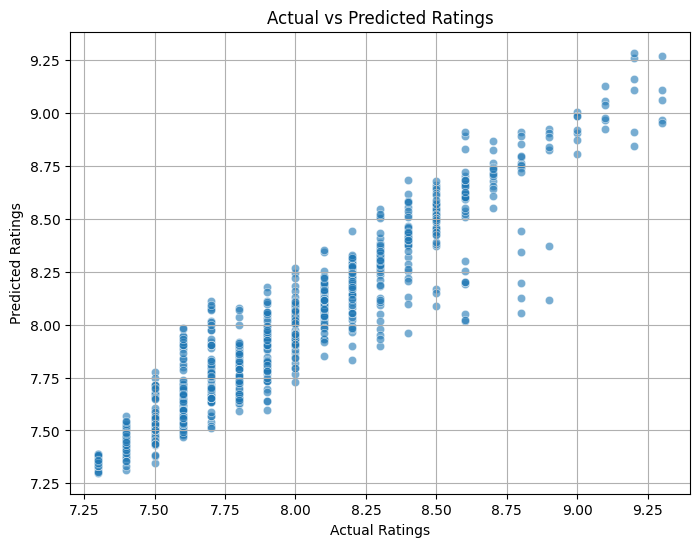

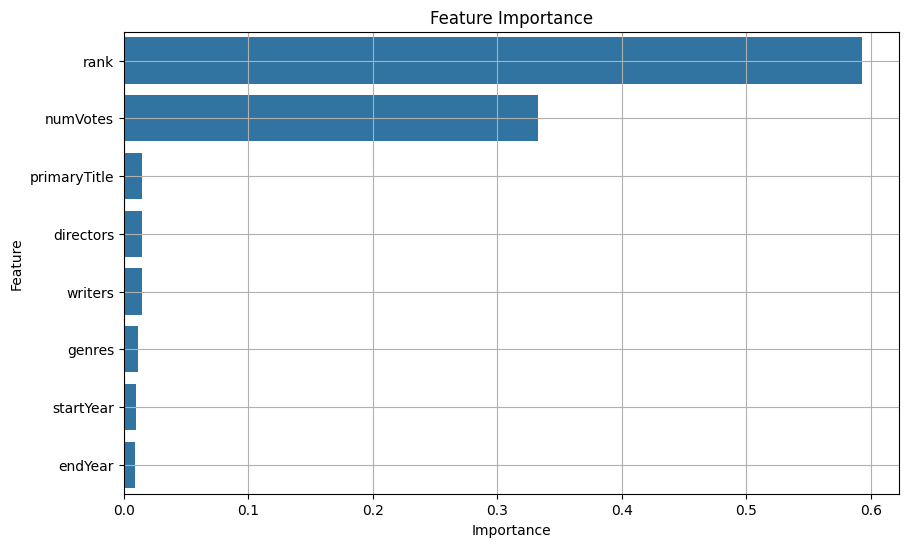

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("imdb_top_5000_tv_shows.csv")
df_clean = df.drop(columns=["tconst", "IMDbLink", "Title_IMDb_Link"])
df_clean = df_clean.dropna()

le = LabelEncoder()
df_clean["primaryTitle"] = le.fit_transform(df_clean["primaryTitle"])
df_clean["directors"] = le.fit_transform(df_clean["directors"])
df_clean["writers"] = le.fit_transform(df_clean["writers"])
df_clean["genres"] = le.fit_transform(df_clean["genres"])

X = df_clean.drop(columns=["averageRating"])
y = df_clean["averageRating"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("R2 Score:", r2)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.title("Actual vs Predicted Ratings")
plt.grid(True)
plt.show()

importances = model.feature_importances_
features = X.columns
indices = importances.argsort()[::-1]

plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=features[indices])
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.grid(True)
plt.show()
